# 데이터 셋 전처리하는 방법인 Data Augmentation을 시각화를 해보자.

* resize
* flip
* brigthness
* blur

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from glob import glob

import torch
from torchvision import transforms

import cv2
import albumentations as A

In [2]:
os.chdir("../../../")

In [3]:
data_dir = os.path.join(os.getcwd(), 'input', 'data')

img_path = os.path.join(data_dir, 'train', 'images')

img_element = os.path.join(img_path, '003101_female_Asian_18', 'mask4.jpg')
img = np.array(Image.open(img_element))

# img_paths = glob(img_path, '**/*')

In [4]:
def one_image_show(img: np.array, figsize = (8,8)):
    fig, ax = plt.subplots(1, 1, figsize=figsize, facecolor='white')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img.astype(int))

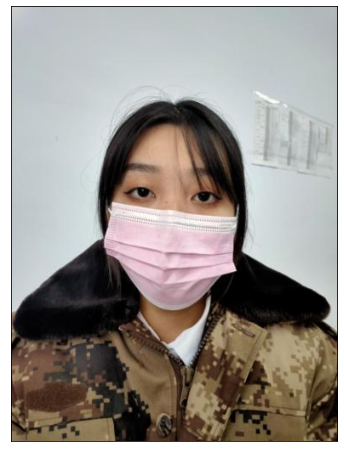

In [5]:
one_image_show(img, (16, 8))

# 1. Resize

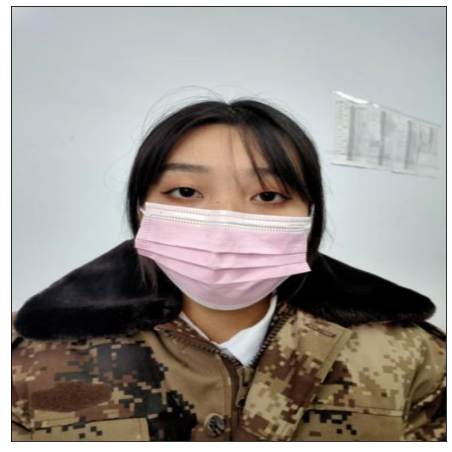

In [6]:
# result = Resize(height=512, width=512, interpolation=1,  p=1)(image=img)['image']

transform = A.Compose([
    A.Resize(512, 512, interpolation=1, p=1),
    ], p=1)

result = transform(image=img)['image']

one_image_show(result)

# 2. Flip

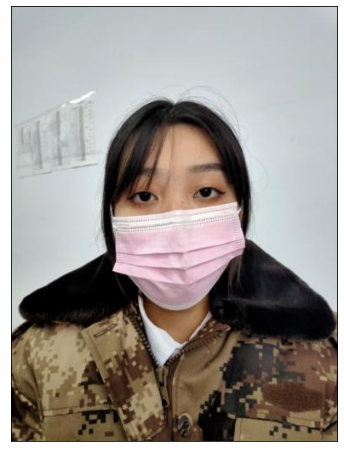

In [7]:
transform = A.Compose([
    A.HorizontalFlip(p=1.0),
    # A.VerticalFlip(p=1.0)
    ], p=1)

result = transform(image=img)['image']

one_image_show(result)

# 3. Crop

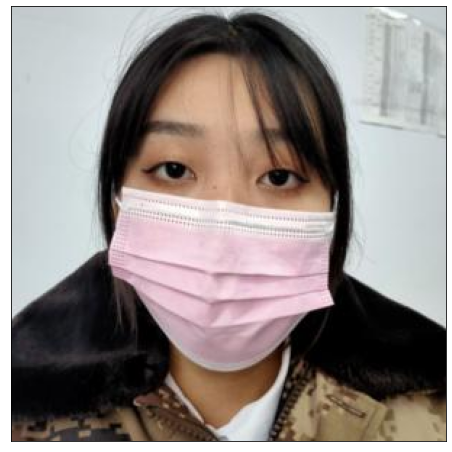

In [8]:
trfm = A.Compose([
    A.CenterCrop(height=300, width=300, p=1),
    # A.RandomCrop(width=100, height=100),
    ], p=1)

result = trfm(image=img)['image']

one_image_show(result)

# 4. Rotate

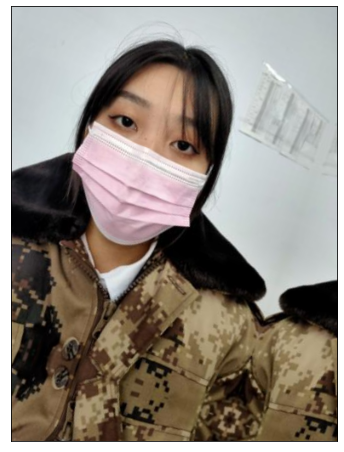

In [9]:
trfm = A.Compose([
    # A.Rotate(limit=10, p=1),
    A.ShiftScaleRotate(
        shift_limit=0.2, # 사진이 이동하는 정도
        scale_limit=0.0001, # 사진이 커지는 정도
        rotate_limit=20, # 사진이 돌아가는 정도
        p=1),
    ], p=1)

result = trfm(image=img)['image']
one_image_show(result)

# 5. Blur

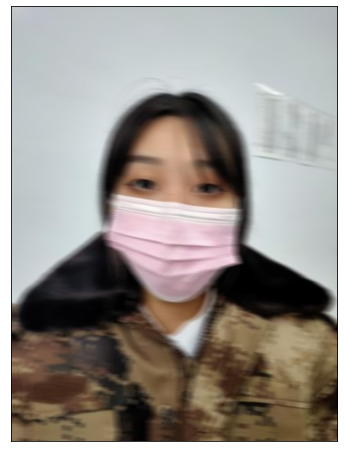

In [13]:
trfm = A.Compose([
    # A.GaussianBlur(
    #     blur_limit=1, # 숫자가 커지면 더 흐려진다.
    #     p=1,
    # ),
    # A.GlassBlur(p=1),
    A.MotionBlur(
        blur_limit = 91,
        p=1),
    ], p=1)

result = trfm(image=img)['image']

one_image_show(result)

# 6. Brightness, Contrast

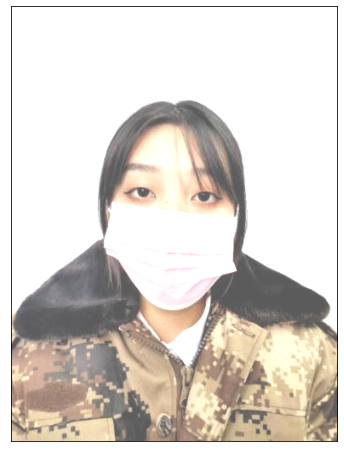

In [119]:
trfm = A.Compose([
    A.RandomBrightnessContrast(
        brightness_limit=0.5,
        contrast_limit=0.4,
        brightness_by_max=True,
        p=1,
    )
    ],p=1)

result = trfm(image=img)['image']
one_image_show(result)

# 7. Noise

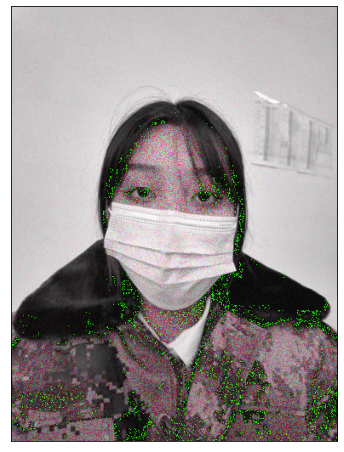

In [137]:
trfm = A.Compose([
    # A.GaussNoise(
    #     var_limit=(1600, 2000), # 최소 ~ 최대
    #     p=1
    # ),
    # A.ISONoise(
    #     color_shift=(5, 17),
    #     p=1)
    ],p=1)

result = trfm(image=img)['image']
one_image_show(result)